# Symbolic math and apparent K_D

Here we use the sympy module to aid in the derivation of expressions for the monovalent-bivalent interconversion constant.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import sympy
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.rcParams.update({'font.size': 25})


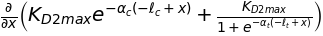

$=$

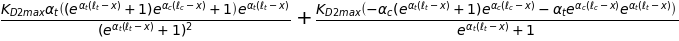

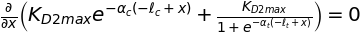

In [3]:
sympy.init_printing()
from sympy import E
from sympy import solveset, symbols, Interval, Min
KD2max, tension_length, tension_pow, compress_length, compress_pow, x = sympy.symbols("K_{D2max} \\ell_{t} \\alpha_t \\ell_{c} \\alpha_c x")
expr = KD2max/(1 + E**(-1*tension_pow*(x-tension_length))) + KD2max*E**(-1*compress_pow*(x-compress_length))
expr_diff = sympy.Derivative(expr, x)  
minimum = sympy.Eq(expr_diff, 0)
display(expr_diff, Markdown("$=$"),sympy.simplify(expr_diff))
# min_numerical = minimum.subs([(coeffa,compa),(alpha,compb),(coeffb,stretcha),(beta,stretchb)])
xmin = sympy.solve(minimum,x)
# xmin_numerical = xmin[0].subs([(coeffa,compa),(alpha,compb),(coeffb,stretcha),(beta,stretchb)])
display(minimum)


lower_bound = 0
upper_bound = 30

# zeros = solveset(expr, x, domain=Interval(lower_bound, upper_bound))
# assert zeros.is_FiniteSet # If there are infinite solutions the next line will hang.
# ans = Min(function.subs(x, lower_bound), function.subs(x, upper_bound), *[function.subs(x, i) for i in zeros])
# display(Markdown("$x_{min}=$"),minimum)
# xminval = ((alpha_t*l_c)/(alpha_c*l_t))**(1/(alpha_c-alpha_t))
# display(Markdown("$x_{min}="+str(xminval)+"$"))

$rate law A$

$rate law B$

$rate law C$

$rate law D$

$rate law E$

$S_{\_,\_} = $

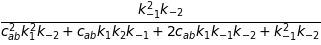

$S_{Ab,\_} = $

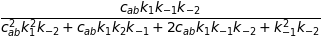

$S_{\_,Ab} = $

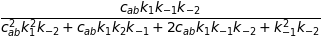

$S_{.Ab.} = $

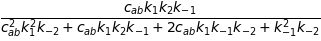

$S_{Ab,Ab} = $

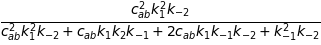

$o_{eq}$

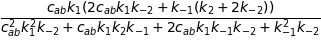

$equilibrium occupancy: O_{eq}$

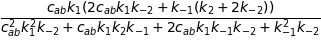

$K_{Dapp} =$

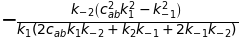

$K_{Dapp} =$

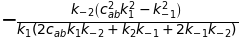

In [4]:
# from IPython.display import display
sympy.init_printing()
kp1, km1, kp2, km2, cab = sympy.symbols("k_1 k_{-1} k_2 k_{-2} c_{ab}", integer=True)
pA, pB, pC, pD, pE, KD2, KD1 = sympy.symbols("p_A p_B p_C p_D p_E K_{D2} K_{D1}")
pAeq, pBeq, pCeq, pDeq, pEeq = sympy.symbols("p_A^{eq} p_B^{eq} p_C^{eq} p_D^{eq} p_E^{eq}", integer=True)
A_eq, B_eq, C_eq, D_eq, E_eq = sympy.symbols("S_{\_\_}  S_{Ab\_}  S_{\_Ab}  S_{.Ab.}  S_{AbAb}")
ratelaw_A = sympy.Eq(km1*pBeq  +  km1*pCeq  -  kp1*cab*pAeq  -  kp1*cab*pAeq, 0)
ratelaw_B = sympy.Eq(kp1*cab*pAeq + km1*pEeq + km2*pDeq - km1*pBeq - kp2*pBeq - kp1*cab*pBeq, 0)
ratelaw_C = sympy.Eq(kp1*cab*pAeq + km1*pEeq + km2*pDeq - km1*pCeq - kp2*pCeq - kp1*cab*pCeq, 0)
ratelaw_D = sympy.Eq(kp2*pBeq  +  kp2*pCeq  -  2*km2*pDeq, 0)
ratelaw_E = sympy.Eq(kp1*cab*pBeq  +  kp1*cab*pCeq  -  2*km1*pEeq, 0)
display(Markdown("$rate law A$"),ratelaw_A)
display(Markdown("$rate law B$"),ratelaw_B)
display(Markdown("$rate law C$"),ratelaw_C)
display(Markdown("$rate law D$"),ratelaw_D)
display(Markdown("$rate law E$"),ratelaw_E)

norm_condition = sympy.Eq(pAeq + pBeq + pCeq + pDeq + pEeq, 1)
sol = sympy.solve((ratelaw_A,ratelaw_B,ratelaw_C,ratelaw_D,ratelaw_E,norm_condition),(pAeq, pBeq, pCeq, pDeq, pEeq))
A_eq = sympy.simplify(sol[pAeq])
B_eq = sympy.simplify(sol[pBeq])
C_eq = sympy.simplify(sol[pCeq])
D_eq = sympy.simplify(sol[pDeq])
E_eq = sympy.simplify(sol[pEeq])

display(Markdown("$S_{\_,\_} = $"),A_eq)
display(Markdown("$S_{Ab,\_} = $"),B_eq)
display(Markdown("$S_{\_,Ab} = $"),C_eq)
display(Markdown("$S_{.Ab.} = $"),D_eq)
display(Markdown("$S_{Ab,Ab} = $"),E_eq)


X_eq = sympy.simplify(sol[pBeq] + sol[pDeq] +sol[pCeq])
O_eq = sympy.simplify(X_eq + 2*E_eq)
O_eq2 = sympy.simplify(1- A_eq + E_eq)

KD_apparent = sympy.simplify(cab*(1-O_eq)/O_eq)
KD_apparent2 = sympy.simplify(cab*(1-O_eq2)/O_eq2)

display(Markdown("$o_{eq}$"),O_eq)

display(Markdown("$equilibrium occupancy: O_{eq}$"),O_eq)


KD_apparent = sympy.simplify(KD_apparent) 
KD_apparent_2 = sympy.simplify(KD_apparent2)
# sympy.init_printing()
display(Markdown("$K_{Dapp} =$"),KD_apparent)
display(Markdown("$K_{Dapp} =$"),KD_apparent_2)




Solution to system of equilibrium equations for Aeq. 
$p_A^{eq} = \displaystyle \frac{k_{-1}^{2} k_{-2}}{\phi^{2} k_{1}^{2} k_{-2} + \phi k_{1} k_{2} k_{-1} + 2 \phi k_{1} k_{-1} k_{-2} + k_{-1}^{2} k_{-2}}$

Solution to K_AZ the apparent dissociation constant:
$K_{AZ} = \displaystyle \frac{k_{-1}^{2} k_{-2}}{\phi k_{1} \left(\phi k_{1} k_{-2} + k_{2} k_{-1} + 2 k_{-1} k_{-2}\right)} = \displaystyle \frac{K_{D2} k_{-1}^{2}}{k_{1} \left(K_{D2} k_{1} + 2 K_{D2} k_{-1} + k_{-1}\right)}$


$\displaystyle \frac{k_{-2} \left(c_{ab}^{2} k_{1}^{2} + k_{-1}^{2}\right)}{k_{1} \left(2 c_{ab} k_{1} k_{-2} + k_{2} k_{-1} + 2 k_{-1} k_{-2}\right)}$
